In [3]:
import numpy as np
from PIL import Image
import tensorflow as tf
import os
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import time
#from keras.utils import multi_gpu_model
from keras import optimizers

In [7]:
WIDTH = 100
HEIGHT = 100
FRAMES = 16

## 读取文件

In [9]:
# 图片是80张 10000像素
SEQUENCE = np.load('sequence_array.npz')['sequence_array']  # load array
print(SEQUENCE.shape)
print('Data loaded.')
print(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime()))

NUMBER = len(SEQUENCE)
print(NUMBER)

(80, 10000)
Data loaded.
2020-05-20 20:00:01
80


In [29]:
# 将原始数据整合成80*100*100*1的特征形式
SEQUENCE = SEQUENCE.reshape(NUMBER, WIDTH, HEIGHT, 1)
print(SEQUENCE.shape)


#def get_sequence()

# 创建输入数据和输出数据
SEQUENCE = SEQUENCE.reshape(NUMBER, WIDTH, HEIGHT, 1)
BASIC_SEQUENCE = np.zeros((NUMBER-FRAMES, FRAMES, WIDTH, HEIGHT, 1))
NEXT_SEQUENCE = np.zeros((NUMBER-FRAMES, FRAMES, WIDTH, HEIGHT, 1))


# NUMBER = 80 FARM=16
for i in range(FRAMES):
    print(i,i+NUMBER-FRAMES,i+NUMBER-FRAMES+1)
    BASIC_SEQUENCE[:, i, :, :, :] = SEQUENCE[i:i+NUMBER-FRAMES]
    NEXT_SEQUENCE[:, i, :, :, :] = SEQUENCE[i+1:i+NUMBER-FRAMES+1]
    
print(BASIC_SEQUENCE.shape)    

    

(80, 100, 100, 1)
0 64 65
1 65 66
2 66 67
3 67 68
4 68 69
5 69 70
6 70 71
7 71 72
8 72 73
9 73 74
10 74 75
11 75 76
12 76 77
13 77 78
14 78 79
15 79 80
(64, 16, 100, 100, 1)


In [33]:
BASIC_SEQUENCE[:10].shape

(10, 16, 100, 100, 1)

In [10]:
%matplotlib inline 

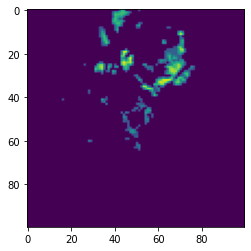

In [31]:
plt.imshow(BASIC_SEQUENCE[1][15].reshape(100, 100))
plt.show()